Abhishek R

ashek6578@gmail.com

batch number : DS2310   

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('avocado.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


* conformed that no null values present 

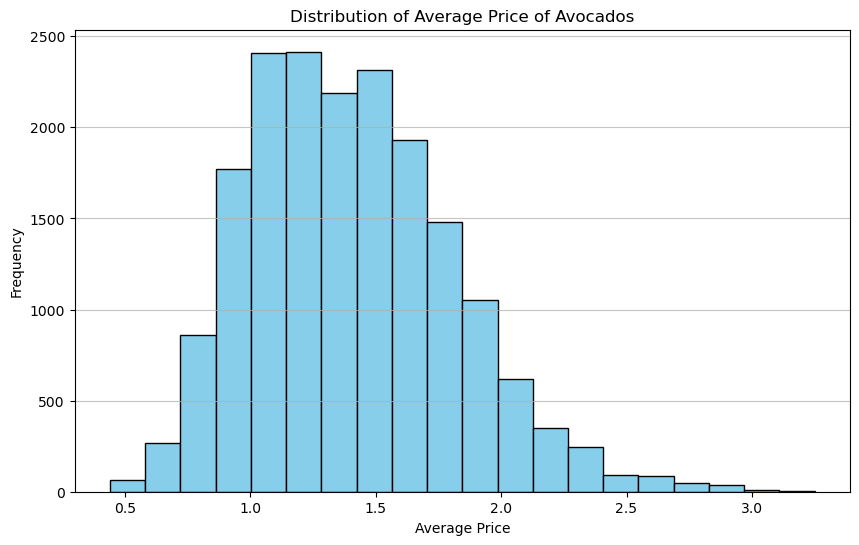

In [4]:
plt.figure(figsize=(10, 6))
df['AveragePrice'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Price of Avocados')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

* The histogram provides an overview of how the average prices are distributed across the dataset

In [5]:
df['type'] = df['type'].replace({'organic': 1, 'conventional': 2})

In [6]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


In [7]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

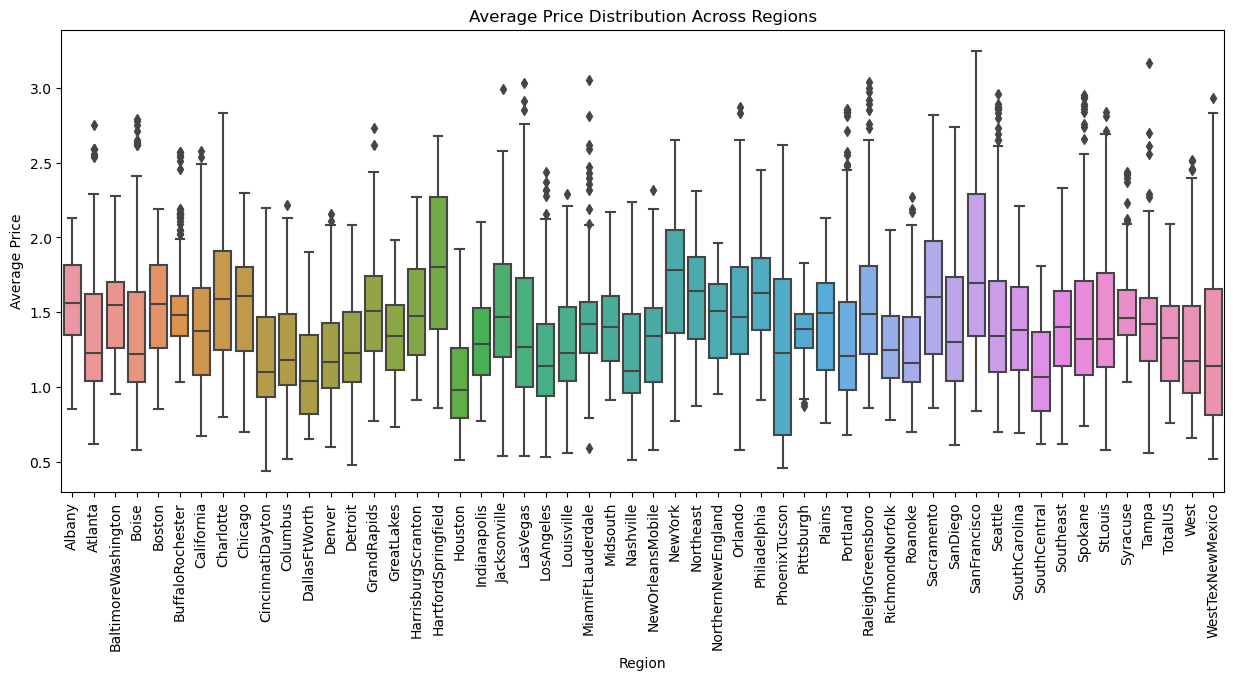

In [8]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='region', y='AveragePrice', data=df)
plt.title('Average Price Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [9]:
lb = LabelEncoder()
df['region'] = lb.fit_transform(df['region'])

In [10]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df = df.drop(['Date'], axis = 1)
df = df[['year', 'month', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region']]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          18249 non-null  int64  
 1   month         18249 non-null  int64  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int64  
 12  region        18249 non-null  int32  
dtypes: float64(9), int32(1), int64(3)
memory usage: 1.7 MB


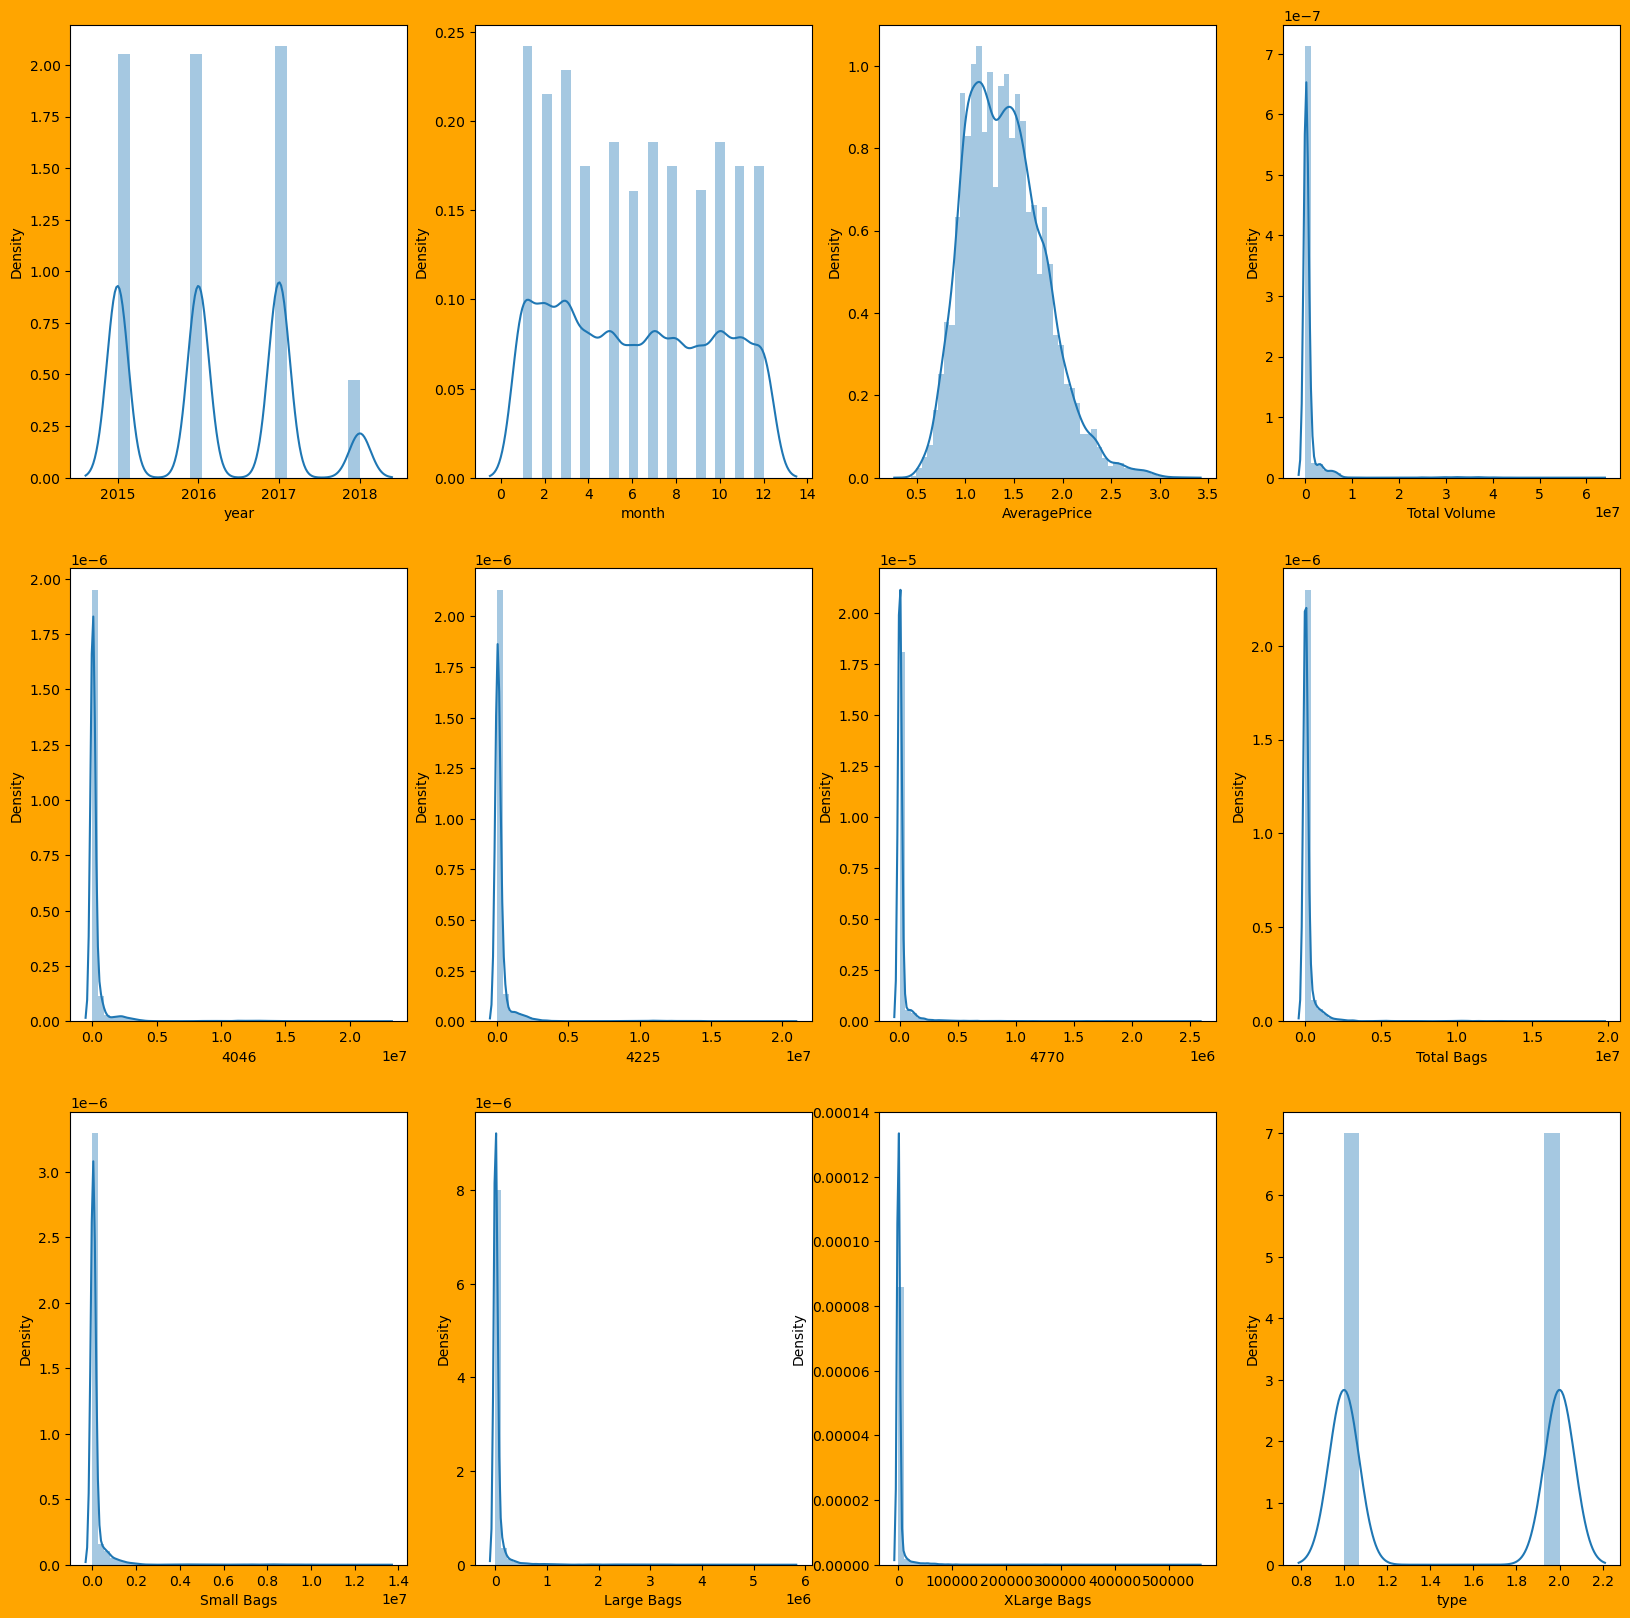

In [13]:
plt.figure(figsize=(20, 20), facecolor="orange")
plots = 1

for i in df.columns:  
    if plots <= 12:
        ax = plt.subplot(3, 4, plots)
        sns.distplot(df[i])
        plt.xlabel(i)
        plots += 1

plt.show()


In [14]:
df.skew()

year             0.215339
month            0.106617
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type            -0.000329
region           0.000030
dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          18249 non-null  int64  
 1   month         18249 non-null  int64  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int64  
 12  region        18249 non-null  int32  
dtypes: float64(9), int32(1), int64(3)
memory usage: 1.7 MB


In [16]:
columns_to_transform = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
for column in columns_to_transform:
    df[column] = np.log1p(df[column])

In [17]:
x= df.drop('region', axis = 1)
y = df['region']

In [18]:
sc = StandardScaler()
xs = sc.fit_transform(x)

In [19]:
ba = 0
brs= 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(xs,y, test_size = 0.20, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pdt = lr.predict(x_test)
    ac = accuracy_score(y_test, pdt)
    if ac > ba:
        ba= ac
        brs = i
print( ba , 'and', brs)

0.5706849315068493 and 194


In [20]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.30, random_state =  194)

In [21]:
classifiers = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
               GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]

In [22]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        result_type = "train"
    else:
        pred = clf.predict(x_test)
        result_type = "test"

    accuracy = accuracy_score(y_train if train else y_test, pred) * 100
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} result is: {accuracy:.2f}%')
for clf in classifiers:
    print(f'\n================== {clf.__class__.__name__} ==================')
    clf.fit(x_train, y_train)
    metric_score(clf, x_train, x_test, y_train, y_test, train=True)
    metric_score(clf, x_train, x_test, y_train, y_test, train=False)


================== LogisticRegression ==================

 ============ train result ==========
train result is: 55.71%

 ============ test result ==========
test result is: 56.04%

================== DecisionTreeClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 78.72%

================== RandomForestClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 90.63%

================== AdaBoostClassifier ==================

 ============ train result ==========
train result is: 7.58%

 ============ test result ==========
test result is: 6.59%

================== GradientBoostingClassifier ==================

 ============ train result ==========
train result is: 98.65%

 ============ test result ==========
test result is: 83.01%

================== SVC ==================

 ============ train result ===

In [23]:
for clf in classifiers:
    clf.fit(x_train, y_train)

    score = cross_val_score(clf, xs, y, cv=5) 

    print(f'\n================== {clf.__class__.__name__} ==================')
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", np.mean(score))
    y_pred = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f"Difference between Accuracy score and cross-validation of{ clf} score is", test_accuracy - np.mean(score))


================== LogisticRegression ==================
Cross-Validation Scores: [0.35315068 0.3830137  0.49178082 0.50273973 0.32200603]
Mean Cross-Validation Score: 0.4105381921111807
Test Accuracy: 0.5604
Difference between Accuracy score and cross-validation ofLogisticRegression() score is 0.1498271046924723

================== DecisionTreeClassifier ==================
Cross-Validation Scores: [0.49452055 0.67808219 0.61068493 0.54465753 0.4028501 ]
Mean Cross-Validation Score: 0.5461590602792283
Test Accuracy: 0.7916
Difference between Accuracy score and cross-validation ofDecisionTreeClassifier() score is 0.24543911323675338

================== RandomForestClassifier ==================
Cross-Validation Scores: [0.62630137 0.8230137  0.76246575 0.6860274  0.47684297]
Mean Cross-Validation Score: 0.674930237970996
Test Accuracy: 0.9096
Difference between Accuracy score and cross-validation ofRandomForestClassifier() score is 0.2346588031248944

================== AdaBoostClassifi

In [24]:
param1 = {  'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20],  'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

rfc = RandomForestClassifier()
rfc_grid_search = GridSearchCV(rfc, param1, cv=5, n_jobs=-1)
rfc_grid_search.fit(x_train, y_train)
print( rfc_grid_search.best_params_)
print( rfc_grid_search.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.9051202135631609


In [25]:
final = RandomForestClassifier(max_depth=None, min_samples_leaf=1 ,min_samples_split=2,n_estimators=200)
final.fit(x_train, y_train)
pred1 = final.predict(x_test)
acc = accuracy_score(y_test, pred1)
print(acc*100)


90.70319634703196


In [26]:
import joblib
joblib.dump(final, "avacado region" )

['avacado region']

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

In [28]:
df1 = df

In [29]:
df1

,year,month,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015,12,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2,0
1,2015,12,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2,0
2,2015,12,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2,0
3,2015,12,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2,0
4,2015,11,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018,2,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,53
18245,2018,1,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,53
18246,2018,1,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,53
18247,2018,1,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,53


In [30]:
x = df.drop('AveragePrice', axis = 1)
y = df['AveragePrice']

In [31]:
sc = StandardScaler()
sc1 = sc.fit_transform(x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(sc1, y, test_size=0.30, random_state =  6)

In [33]:
regressor = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),
             AdaBoostRegressor(),GradientBoostingRegressor(),SVR(),KNeighborsRegressor()]

In [34]:
def metric_score(rg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_score = rg.predict(x_train)
        result_type = "train"
    else:
        y_score = rg.predict(x_test)
        result_type = "test"

    mse = mean_squared_error(y_train if train else y_test, y_score)
    r2 = r2_score(y_train if train else y_test, y_score) * 100
    
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} R2 score: {r2:.2f}%')
    print(f'{result_type}  MSE : {mse:.4f}')


In [35]:
for rg in regressor:
    print(f'\n================== {rg.__class__.__name__} ==================')
    rg.fit(x_train, y_train)
    metric_score(rg, x_train, x_test, y_train, y_test, train=True)
    metric_score(rg, x_train, x_test, y_train, y_test, train=False)


================== LinearRegression ==================

 ============ train result ==========
train R2 score: 55.44%
train  MSE : 0.0717

 ============ test result ==========
test R2 score: 56.88%
test  MSE : 0.0712

================== DecisionTreeRegressor ==================

 ============ train result ==========
train R2 score: 100.00%
train  MSE : 0.0000

 ============ test result ==========
test R2 score: 75.44%
test  MSE : 0.0406

================== RandomForestRegressor ==================

 ============ train result ==========
train R2 score: 98.34%
train  MSE : 0.0027

 ============ test result ==========
test R2 score: 89.65%
test  MSE : 0.0171

================== AdaBoostRegressor ==================

 ============ train result ==========
train R2 score: 56.99%
train  MSE : 0.0692

 ============ test result ==========
test R2 score: 58.93%
test  MSE : 0.0678

================== GradientBoostingRegressor ==================

 ============ train result ==========
train R2 score: 

In [36]:
for rg in regressor:
    cv = cross_val_score(rg, x, y, cv = 5)
    print('===========',rg, '==============')
    print('cv mean' ,cv.mean())
    a = rg.predict(x_test)
    print('diff between r2 score and cv score', (r2_score(y_test, a ) - cv.mean() ))

=========== LinearRegression() ==============
cv mean 0.2097320501413435
diff between r2 score and cv score 0.35903762285104796
=========== DecisionTreeRegressor() ==============
cv mean -0.30734028797824425
diff between r2 score and cv score 1.0617061672874464
=========== RandomForestRegressor() ==============
cv mean 0.20186373109301617
diff between r2 score and cv score 0.6946426172200525
=========== AdaBoostRegressor() ==============
cv mean -0.019573885507746393
diff between r2 score and cv score 0.6088963389485388
=========== GradientBoostingRegressor() ==============
cv mean 0.3743915542766885
diff between r2 score and cv score 0.3817081965146791
=========== SVR() ==============
cv mean -0.5086031602903001
diff between r2 score and cv score 1.304254303370019
=========== KNeighborsRegressor() ==============
cv mean -0.3275681072760993
diff between r2 score and cv score 1.2000871178989798


In [37]:
param = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

Best parameters for Random Forest Regressor:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [38]:
final = RandomForestRegressor(max_depth=None, min_samples_leaf=1 ,min_samples_split=2,n_estimators=200)
final.fit(x_train, y_train)
pred1 = final.predict(x_test)
acc = r2_score(y_test, pred1)
print(acc*100)

89.66438368024522


In [39]:
import joblib
joblib.dump(final, "avacado avg price" )

['avacado avg price']